# Acceptance-Rejection  (Cauchy --> Normal)

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import norm
from scipy.stats import cauchy
import itertools
import matplotlib.patches as mpatches
%matplotlib inline

# 1. generate:  N(0,1) & Cauchy(0,1)

In [23]:
# norm.pdf?

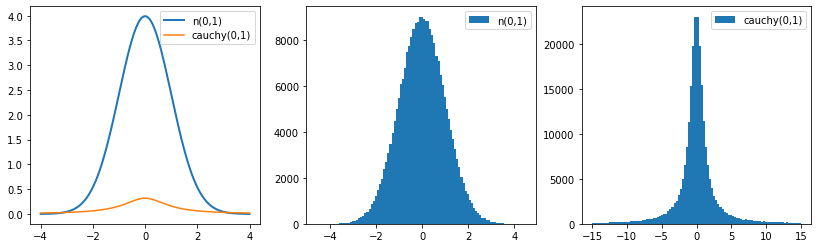

In [43]:
a = np.linspace(-4,4,200)
b = norm.pdf(a, 0, 1)    # b = phi(a) 
c = cauchy.pdf(a, 0, 1)  

sample_size=250000
rn1 = np.random.standard_normal(sample_size)
rn2 = np.random.standard_cauchy(sample_size)
rn2 = rn2[(rn2>-15) & (rn2<15)]  # truncate distribution so it plots well

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ax1.plot(a,10*b, lw=2.0)
ax1.plot(a,c)
ax1.legend(['n(0,1)', 'cauchy(0,1)'], loc=0)
ax2.hist(rn1, bins=100)
ax2.legend(['n(0,1)'], loc=0)
ax3.hist(rn2, bins=100)
ax3.legend(['cauchy(0,1)'], loc=0)

# 2. generate: Cauchy(0,1) "for loop"

DescribeResult(nobs=200, minmax=(-140.27079021340157, 89.64221974223823), mean=0.48865287953753417, variance=224.69232839494822, skewness=-2.242879441263224, kurtosis=48.38927827889478)


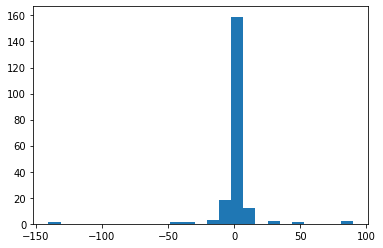

In [25]:
sample_number=200
cum=[]
for i in range(sample_number):
    xc = np.random.standard_cauchy()
    cum.append(xc)

print(stats.describe(cum))

plt.hist(cum, bins = 25)
plt.show()

# 3. Acceptance-Rejection  (Cauchy --> Normal)

In [38]:
simulation_number = 1000


cum=[]              # collection of good x's
accept_rate = []
count=0             # number of good x's among simulation_number

for i in range(1,simulation_number):
    xc = np.random.standard_cauchy()
    draw = random.random()
    if draw < min(1, norm.pdf(xc,0,1)/(1.52*cauchy.pdf(xc,0,1))):   
        cum.append(xc)
        count += 1
        accept_rate.append(count/i)
    else:
        ()

print("mean = ", np.mean(cum))    
print(stats.describe(cum))
print("accep rate =", count/(simulation_number))    # true M == 0.66
        

#a = np.linspace(-4,4,200)
#b = norm.pdf(a, 0, 1)
#plt.plot(a,b)
#plt.plot(cum, norm.pdf(cum,0,1),'bo')
#plt.legend(['pdf', 'simulation'], loc=0)

mean =  -0.01858118634943227
DescribeResult(nobs=657, minmax=(-2.813479640395189, 3.825885477512512), mean=-0.01858118634943227, variance=0.8878357232586327, skewness=-0.02569040973292228, kurtosis=0.1368471113396601)
accep rate = 0.657


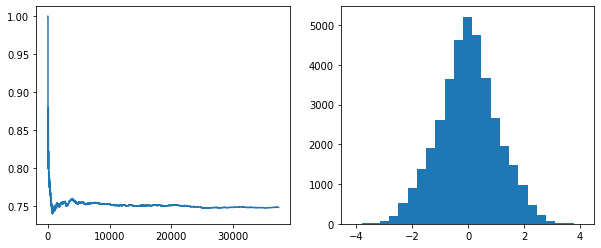

In [34]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.plot(accept_rate, lw=1.5)
ax2.hist(cum, bins=25)
plt.show()